# Ejercicio Python SVM
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from scipy.io import loadmat
import seaborn as sns
%matplotlib inline

## Cargamos los datos de entrada del archivo .csv Train

In [2]:
# Load data
train = pd.read_csv('train.csv', sep=',')
df_train=pd.DataFrame(train)
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
# Hay 2 opciones en la columna 'HomePlanet'. Como son campos de tipo object, osea, string, los paso a 0 ó 1 con el metodo getdummies y los guardo en un dataframe temporal.
planetas=pd.get_dummies(df_train['HomePlanet'])
planetas

,Earth,Europa,Mars
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
8688,0,1,0
8689,1,0,0
8690,1,0,0
8691,0,1,0


In [4]:
#Creo las 3 columas nuevas para guardar los valores del dataframe que use para getdummies
df_train['Earth']=planetas['Earth']
df_train['Europa']=planetas['Europa']
df_train['Mars']=planetas['Mars']
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,1,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1,0,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1,0,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,1,0


In [5]:
df_train=df_train.fillna(df_train.mean())
df_train['Cabin']= df_train['Cabin'].astype('string')
# df_train['Cabin']=df_train['Cabin'].apply(lambda x: x[-1])

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [6]:
# Separo la columna cabin en 3 para crear mas tarde 3 nuevas columnas con sus correspondientes valores sacados de esta
df_train['Cabin_Side'] = df_train['Cabin'].str.split("/").str[2]
df_train['Cabin_num'] = df_train['Cabin'].str.split("/").str[1]
df_train['Cabin_Deck'] = df_train['Cabin'].str.split("/").str[0]

In [7]:
# Separo la columna 'Cabin_Side' en 2, porq tiene 2 valores,P y S y las guardo 
cabinas = pd.get_dummies(df_train['Cabin_Side'])
df_train[['Cabin_Side_P', 'Cabin_Side_S']] = cabinas[['P', 'S']]

In [8]:
# Convertimos la columna Cabin_deck a numerica con getdummies y la guardo en columnas individuales separadas
cabinas = pd.get_dummies(df_train['Cabin_Deck'])
df_train[['Cabin_Deck_A', 'Cabin_Deck_B','Cabin_Deck_C','Cabin_Deck_D','Cabin_Deck_E','Cabin_Deck_F','Cabin_Deck_G','Cabin_Deck_T']] = cabinas[['A', 'B','C','D','E','F','G','T']]

In [9]:
# El campo 'Cabin_num', tiene valores . Lo relleno provisionalmente cn nueves y despues con NAN que son valores nulos pero de typo Float :)
df_train['Cabin_num']=df_train['Cabin_num'].fillna('-99999999')
df_train['Cabin_num'].replace({"-99999999": np.nan})
df_train['Cabin_num'].value_counts

<bound method IndexOpsMixin.value_counts of 0          0
1          0
2          0
3          0
4          1
        ... 
8688      98
8689    1499
8690    1500
8691     608
8692     608
Name: Cabin_num, Length: 8693, dtype: object>

In [10]:
#Borramos las columnas que he ido trasformando y que ya no me sirven
df_train.drop('Cabin_Side', axis=1, inplace=True)
df_train.drop('HomePlanet', axis=1, inplace=True)
df_train.drop('Destination', axis=1, inplace=True)
df_train.drop('Name', axis=1, inplace=True)
df_train.drop('Cabin',axis=1, inplace=True)
df_train.drop('Cabin_Deck',axis=1, inplace=True)

#Transformamos la columna VIP, q esta cm string a tipo float
df_train['VIP'] = df_train['VIP'].replace({False: 0, True: 1})
df_train['Cabin_num']=df_train['Cabin_num'].astype(int)

df_train=df_train.fillna(df_train.mean())
df_train = df_train.dropna()


In [11]:
# Ahora si...ataframe limpio de valores nulos y sin tipos de campos String o Object oncompatibles a la hora de crear el modelo y entrenarlo
df_train.isnull().sum()

PassengerId     0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Earth           0
Europa          0
Mars            0
Cabin_num       0
Cabin_Side_P    0
Cabin_Side_S    0
Cabin_Deck_A    0
Cabin_Deck_B    0
Cabin_Deck_C    0
Cabin_Deck_D    0
Cabin_Deck_E    0
Cabin_Deck_F    0
Cabin_Deck_G    0
Cabin_Deck_T    0
dtype: int64

In [12]:
df_train

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0001_01,False,39.0,0.0,0.0,0.0,0.0,0.0,0.0,False,...,1,0,0,1,0,0,0,0,0,0
1,0002_01,False,24.0,0.0,109.0,9.0,25.0,549.0,44.0,True,...,0,1,0,0,0,0,0,1,0,0
2,0003_01,False,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,False,...,0,1,1,0,0,0,0,0,0,0
3,0003_02,False,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,False,...,0,1,1,0,0,0,0,0,0,0
4,0004_01,False,16.0,0.0,303.0,70.0,151.0,565.0,2.0,True,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,False,...,1,0,1,0,0,0,0,0,0,0
8689,9278_01,True,18.0,0.0,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,0,0,0,0,0,1,0
8690,9279_01,False,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,True,...,0,1,0,0,0,0,0,0,1,0
8691,9280_01,False,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,0,0


In [13]:
# Definimos las variables que me guardan los datos a entrenar separados del target 
y=df_train['Transported']

X=df_train[['PassengerId', 'CryoSleep', 'Age','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Earth','Europa','Mars','Cabin_num','Cabin_Deck_A','Cabin_Deck_B','Cabin_Deck_C','Cabin_Deck_D',
       'Cabin_Deck_E','Cabin_Deck_F','Cabin_Deck_G','Cabin_Deck_T','Cabin_Side_P','Cabin_Side_S']]

In [14]:
#Separamos los datos 70% Train, 30% Test (Es la proporcion pedida en Kaggel)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (6085, 23)	y_train: (6085,)
X_test: (2608, 23)	y_test: (2608,)


### (Optional) Random forest without parameter tuning

<AxesSubplot:>

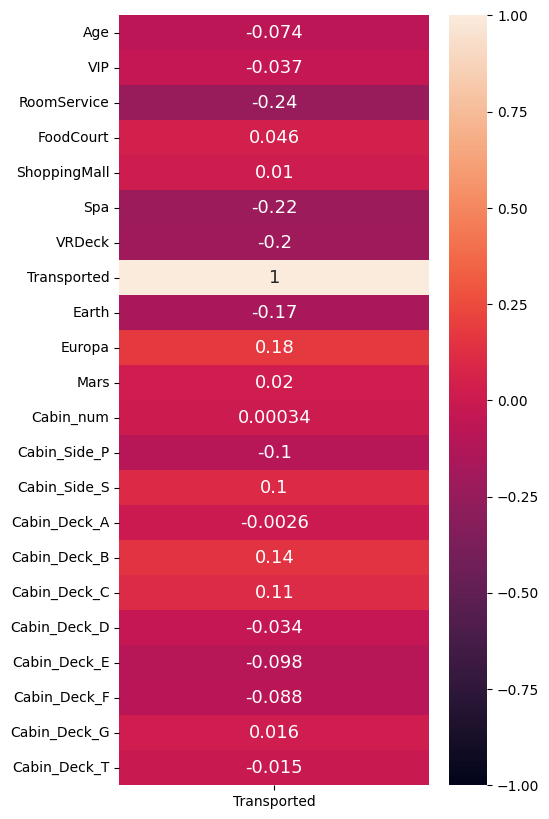

In [15]:
plt.figure(figsize=(5, 10))
sns.heatmap(df_train.corr()[['Transported']], vmin=-1, vmax=1, annot=True, annot_kws={"size":13})



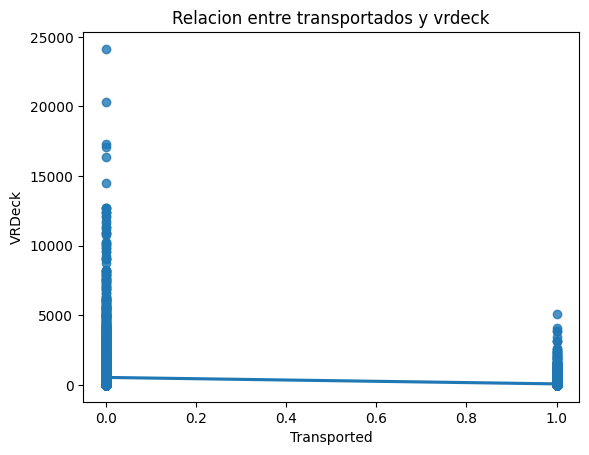

In [16]:
sns.regplot(data=df_train, x='Transported', y='VRDeck')
plt.title("Relacion entre transportados y vrdeck");

In [17]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC, SVR

# lr = LogisticRegression()
# tree = DecisionTreeClassifier(min_samples_leaf=2)
# svc = SVC(kernel='linear', C=.005)

# ls_models = {'LogisticRegression': lr, 'DecisionTreeClassifier':tree, 'SVCLinear': svc}
# ls_acc = []
# ls_preds = []
# for name, model in ls_models.items():
#     model.fit(X, y)
#     y_hat = model.predict(X)
#     ls_preds.append(y_hat)

#     acc = accuracy_score(y, y_hat)
#     ls_acc.append(acc)

#     print(name)
#     print(f'ACCURACY: {acc:.2%}')

#     print("\n\n")

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR

lr = LogisticRegression()
tree = DecisionTreeClassifier(min_samples_leaf=2)
svc = SVC(kernel='linear', C=.005)

ls_models = {'LogisticRegression': lr, 'DecisionTreeClassifier':tree, 'SVCLinear': svc}
ls_acc = []
ls_preds = []
for name, model in ls_models.items():
    model.fit(X, y)
    y_hat = model.predict(X)
    ls_preds.append(y_hat)

    acc = accuracy_score(y, y_hat)
    ls_acc.append(acc)

    print(name)
    print(f'ACCURACY: {acc:.2%}')

    print("\n\n")

LogisticRegression
ACCURACY: 77.23%



DecisionTreeClassifier
ACCURACY: 95.24%





## Visualizamos los datos

In [ ]:
# fig = plt.figure(figsize=(25, 15))
# cols = 5
# rows = np.ceil(float(df_train.shape[1]) / cols)
# for i, column in enumerate(df_train.columns):
#     ax = fig.add_subplot(rows, cols, i + 1)
#     ax.set_title(column)
#     if df_train.dtypes[column] == np.object:
#         df_train[column].value_counts().plot(kind="bar", axes=ax)
#     else:
#         df_train[column].hist(axes=ax)
#         plt.xticks(rotation="vertical")
# plt.subplots_adjust(hspace=0.7, wspace=0.2)

## Cargamos los datos de entrada del archivo .csv Test

In [ ]:
# Load data
test = pd.read_csv('test.csv', sep=',')
df_test=pd.DataFrame(test)
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
# Hay 2 opciones en la columna 'HomePlanet'. Como son campos de tipo object, osea, string, los paso a 0 ó 1 con el metodo getdummies y los guardo en un dataframe temporal.

planetas_t=pd.get_dummies(df_test['HomePlanet'])
planetas_t

,Earth,Europa,Mars
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
4272,1,0,0
4273,1,0,0
4274,0,0,1
4275,0,1,0


In [ ]:
#Creo las 3 columas nuevas para guardar los valores del dataframe que use para getdummies
df_test['Earth']=planetas_t['Earth']
df_test['Europa']=planetas_t['Europa']
df_test['Mars']=planetas_t['Mars']
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Earth,Europa,Mars
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,0,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,0,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,1,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,1,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1,0,0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1,0,0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0,0,1
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0,1,0


In [ ]:
df_test=df_test.fillna(df_test.mean())
df_test['Cabin']= df_test['Cabin'].astype('string')
# df_test['Cabin']=df_test['Cabin'].apply(lambda x: x[-1])

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
# Separo la columna cabin en 3 para crear mas tarde 3 nuevas columnas con sus correspondientes valores sacados de esta
df_test['Cabin_Side'] = df_test['Cabin'].str.split("/").str[2]
df_test['Cabin_num'] = df_test['Cabin'].str.split("/").str[1]
df_test['Cabin_Deck'] = df_test['Cabin'].str.split("/").str[0]

In [ ]:
# Separo la columna 'Cabin_Side' en 2, porq tiene 2 valores,P y S y las guardo 

cabinas_test = pd.get_dummies(df_test['Cabin_Side'])
df_test[['Cabin_Side_P', 'Cabin_Side_S']] = cabinas_test[['P', 'S']]

In [ ]:
# Convertimos la columna Cabin_deck a numerica con getdummies y la guardo en columnas individuales separadas

cabinas_test = pd.get_dummies(df_test['Cabin_Deck'])
df_test[['Cabin_Deck_A', 'Cabin_Deck_B','Cabin_Deck_C','Cabin_Deck_D','Cabin_Deck_E','Cabin_Deck_F','Cabin_Deck_G','Cabin_Deck_T']] = cabinas_test[['A', 'B','C','D','E','F','G','T']]

In [ ]:
# El campo 'Cabin_num', tiene valores . Lo relleno provisionalmente cn nueves y despues con NAN que son valores nulos pero de typo Float :)

df_test['Cabin_num']=df_test['Cabin_num'].fillna('-99999999')
df_test['Cabin_num'].replace({"-99999999": np.nan})
df_test['Cabin_num'].value_counts

<bound method IndexOpsMixin.value_counts of 0               3
1               4
2               0
3               1
4               5
          ...    
4272         1496
4273    -99999999
4274          296
4275          297
4276         1498
Name: Cabin_num, Length: 4277, dtype: object>

In [ ]:
#Borramos las columnas que he ido trasformando y que ya no me sirven

df_test.drop('Cabin_Side', axis=1, inplace=True)
df_test.drop('HomePlanet', axis=1, inplace=True)
df_test.drop('Destination', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)
df_test.drop('Cabin',axis=1, inplace=True)
df_test.drop('Cabin_Deck',axis=1, inplace=True)

#Transformamos la columna VIP, q esta cm string a tipo float
df_test['VIP'] = df_test['VIP'].replace({False: 0, True: 1})
df_test['Cabin_num']=df_test['Cabin_num'].astype(int)

df_test=df_test.fillna(df_test.mean())
df_test = df_test.dropna()


In [ ]:
# Ahora si...ataframe limpio de valores nulos y sin tipos de campos String o Object oncompatibles a la hora de crear el modelo y entrenarlo
df_train.isnull().sum()

PassengerId     0
CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Earth           0
Europa          0
Mars            0
Cabin_num       0
Cabin_Side_P    0
Cabin_Side_S    0
Cabin_Deck_A    0
Cabin_Deck_B    0
Cabin_Deck_C    0
Cabin_Deck_D    0
Cabin_Deck_E    0
Cabin_Deck_F    0
Cabin_Deck_G    0
Cabin_Deck_T    0
dtype: int64

In [ ]:
df_test

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0013_01,True,27.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
1,0018_01,False,19.000000,0.0,0.0,9.0,0.0,2823.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
2,0019_01,True,31.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,0,0
3,0021_01,False,38.000000,0.0,0.0,6652.0,0.0,181.0,585.0,0,...,0,1,0,0,1,0,0,0,0,0
4,0023_01,False,20.000000,0.0,10.0,0.0,635.0,0.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
4273,9269_01,False,42.000000,0.0,0.0,847.0,17.0,10.0,144.0,1,...,0,0,0,0,0,0,0,0,0,0
4274,9271_01,True,28.658146,0.0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,0,1,0,0,0,0
4275,9273_01,False,28.658146,0.0,0.0,2680.0,0.0,0.0,523.0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
prediccion_test = pd.DataFrame(rf.predict(df_test))
prediccion_test['PassengerId'] =df_test['PassengerId']
prediccion_test = prediccion_test.rename(columns = {0:'Transported'})
prediccion_test = prediccion_test[['PassengerId','Transported']]
prediccion_test.to_csv('SVM.csv', index=False)
prediccion_test

c:\Users\Alberto\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
